# Como foi realizado o finetuning

### 1- Alterar a função train em model.py path (no meu caso) ====> C:\Users\Vinip\anaconda3\Lib\site-packages\ultralytics\engine\model.py

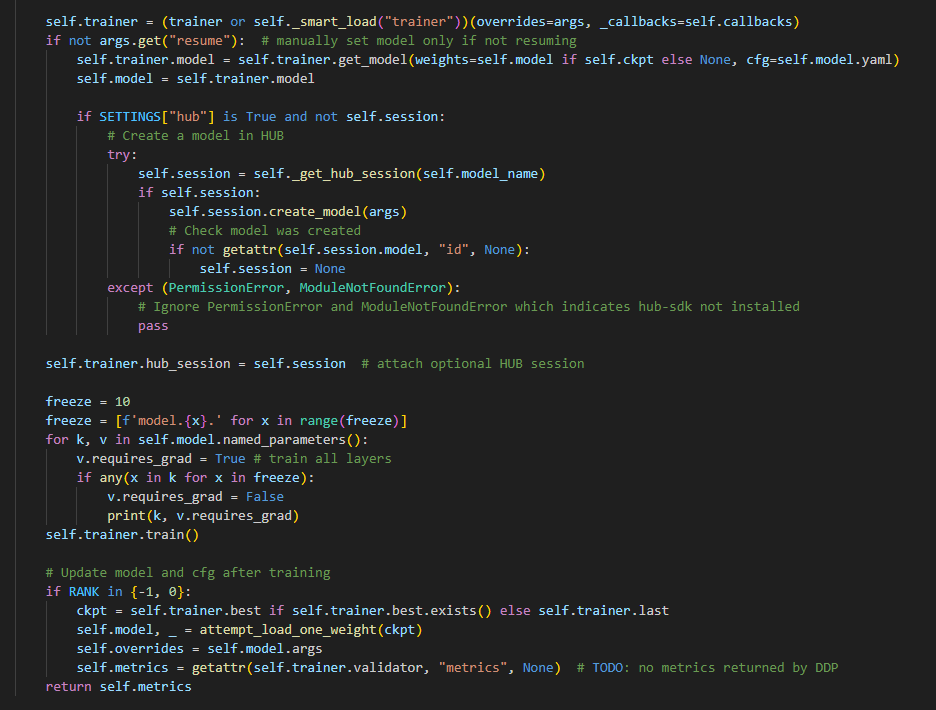


In [ ]:
## em def train() inserir o codiigo abaixo logo antes de "self.trainer.train()"

freeze = 10
freeze = [f'model.{x}.' for x in range(freeze)]  
for k, v in self.model.named_parameters(): 
    v.requires_grad = True # train all layers 
    if any(x in k for x in freeze): 
        v.requires_grad = False
        print(k, v.requires_grad)

#freeze = 10 indica que as camadas de 0 a 9 (backbone) teram seus requires_grad = False, colocar 23 fara com que todas as camadas menos a ultima seja congelada


### 2- colocar a flag freeze = sequencia de camadas a ser congelada, o valor deve ser o mesmo definido acima

results = model.train(epochs = 7, bach = 8, freeze = 10)


### fonte

https://medium.com/@cascak/accelerate-yolov8-training-by-freezing-network-layers-weights-0a143e6201fe

https://github.com/ultralytics/ultralytics/issues/793

